In [3]:
from pyfirmata2 import Arduino, util
from time import sleep
from sympy import cos, sin, atan2
from sympy.matrices import Matrix
from numpy import pi
import matplotlib.pyplot as plt
import numpy as np


In [4]:
def inv_kin_3(pos, lengths):
  x, y, z = pos
  l1, l2, l3 = lengths

  # parallel handling
  kx = x - l3 # l1*s1 + l2*s12
  ky = y      # l1*c1 + l2*c12

  c2 = (kx**2 + ky**2 - l1**2 - l2**2)/(2*l1*l2)
  s2 = np.sqrt(1-c2**2)
  theta_2 = float(atan2(s2, c2))

  M = Matrix([
    [l1+l2*c2, l2*s2],
    [-l2*s2  , l1+l2*c2]
  ])
  M_inv = M.inv()
  s1, c1 = M_inv*Matrix(2, 1, [kx, ky])
  theta_1 = float(atan2(s1, c1))
  theta_3 = pi/2 - theta_1 - theta_2
  angles = [theta_1, theta_2, theta_3]
  Plot(tuple(angles), pos, lengths)
  return np.array(angles)*180/pi

def Plot(angles, pos, lengths):
  x, y, z = pos
  l1, l2, l3 = lengths
  a1, a2, a3 = angles
  plt.xlim((-50, 75))
  plt.ylim((-50, 75))
  
  xs = [0, l1*sin(a1), l1*sin(a1)+l2*sin(a1+a2), l1*sin(a1)+l2*sin(a1+a2)+l3*sin(a1+a2+a3)]
  ys = [0, l1*cos(a1), l1*cos(a1)+l2*cos(a1+a2), l1*cos(a1)+l2*cos(a1+a2)+l3*cos(a1+a2+a3)]

  plt.plot(xs, ys)
  plt.plot(x, y, 'ro')

  kx = x - l3 # l1*s1 + l2*s12
  ky = y      # l1*c1 + l2*c12
  plt.plot(kx, ky, 'ro')
  plt.plot(0, 0, 'ro')
  plt.show()
  # plt.savefig('plot.png')

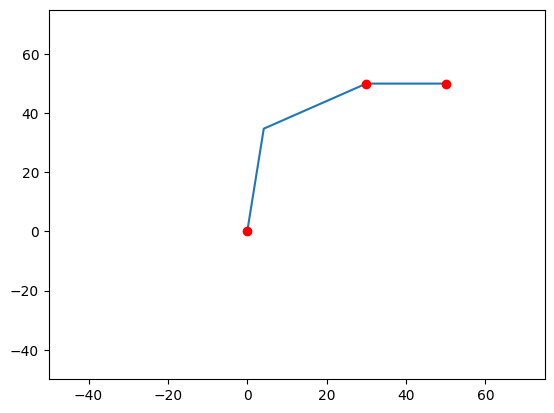

[ 6.83336693 52.61680158 30.54983149]


In [5]:
lengths = (35, 30, 20)
position = (50, 50, 40)
angles = inv_kin_3(position, lengths)
print(angles)

In [123]:
dev = Arduino.AUTODETECT
print(dev)
board = Arduino(dev)
print("Communication started...")
hinge1 = board.get_pin('d:9:s')
hinge2 = board.get_pin('d:10:s')
hinge3 = board.get_pin('d:11:s')
# led = board.get_pin('d:13:o')

None
Communication started...


In [71]:
# hinge1.read(), hinge2.read(), hinge3.read()

0

In [124]:
def set_angle(srvo, angle):
    start = srvo.read()
    if start < angle:
        for i in range(start, angle+1):
            srvo.write(i)
            sleep(0.01)
    else:
        for i in range(start, angle-1, -1):
            srvo.write(i)
            sleep(0.01)


In [127]:
set_angle(hinge1, 90)

In [128]:
hinge1.read()

90

In [110]:
hinge2.write(90)

In [52]:
a, b = 90, 120
n = 30
t = 25/(n*1000)
start = hinge1.read()
while True:
    for i in range(int(max(n*a, n*start)), n*b):
        hinge1.write(i/n)
        # hinge2.write(i/n)
        # hinge3.write(i/n)
        sleep(0.1)
    for i in range(n*b, n*a, -1):
        hinge1.write(i/n)
        # hinge2.write(i/n)
        # hinge3.write(i/n)
        sleep(0.1)
    start = 0

KeyboardInterrupt: 

In [85]:
a, b = 90, 120
n = 30
t = 25/(1000*n)
start = servo.read()
while True:
    for i in range(int(max(n*a, n*start)), n*b):
        servo.write(i/n)
        sleep(t)
    sleep(0.1)
    for i in range(n*b, n*a, -1):
        servo.write(i/n)
        sleep(t)
    sleep(0.1)
    start = 0


KeyboardInterrupt: 

In [106]:
def Plot(angles, l1=35, l2=30):
  a1, a2 = angles*pi/180
  # plt.xlim((-5, 5))
  # plt.ylim((-5, 5))
  xs = [0, l1*sin(a1), l1*sin(a1)+l2*sin(a1+a2)]
  ys = [0, l1*cos(a1), l1*cos(a1)+l2*cos(a1+a2)]

  plt.plot(xs, ys)
  plt.plot(x, y, 'ro')
  plt.plot(0, 0, 'ro')
  plt.show()


In [96]:
def inv_kin(x, y, l1=35, l2=30):
  c2 = (x**2 + y**2 - l1**2 - l2**2)/(2*l1*l2)
  s2 = np.sqrt(1-c2**2)
  theta_2 = float(atan2(s2, c2))

  M = Matrix([
    [l1+l2*c2, l2*s2],
    [-l2*s2  , l1+l2*c2]
  ])
  M_inv = M.inv()
  s1, c1 = M_inv*Matrix(2, 1, [x, y])
  theta_1 = float(atan2(s1, c1))

  angles = np.array([theta_1, theta_2])*180/pi
  # print(theta_1)

  # Plot((theta_1, theta_2))
  # print(s1, s2, c1, c2)

  return angles

[10.71498018 97.52463022]


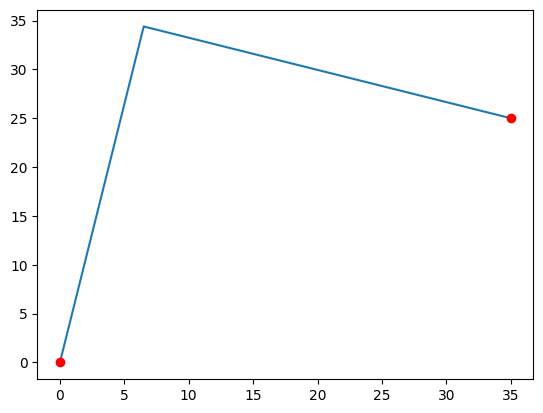

In [107]:
x, y = 35, 25

angles = inv_kin(x, y)
print(angles) 
Plot(angles)

In [ ]:
a, b = angles
n = 30
t = 25/(1000*n)
start1 = hinge1.read()
start2 = hinge2.read()

for i in range(start1, 0, -1):
    hinge1.write(i/n)
    sleep(t)

sleep(0.1)

for i in range(n*a, n*b):
    hinge2.write(i/n)
    sleep(t)